# Titulo : Analisis de Plan de desarrollo nacional 2019-2022
Deberemos complementar la parte I con:

1. Abstracto con motivación y audiencia

**Objetivo:** Identificar si los indicadores mas importantes del plan de desarrollo nacional se han cumplido 

**Contexto comercial:** Este trabajo se enmarca en las proyecciones que realizan los estados con el fin de cumplir sus metas a mediano y corto plazo. En particular se analiza el caso de Colombia tomando las ultimas métricas referentes al estado actual de ejecución del último plan de desarrollo nacional.

**Contexto analitico:** La fuente de información se obtuvo del portal `datosabiertos.gov.co` en formato csv. La data originalmente se genera desde el DNP = Dirección Nacional de Planeación. Se tiene registro de indicadores macroeconomicos principalmente respecto a los últimos 4-5 planes de desarrollo de Colombia

**Abstract**
En este trabajo se analiza el plan ND. 
Se utiliza informacion de fuente **XXX (origen, metadata y fuentes)** con el **fin de YY (Objtivo)**. 
Los resultados muestran **AA (resultados mas importantes)**. Se concluye **ZZ (conclusiones relevantes)**

**Motivacion y audiencia:** Este trabajo ayuda a identificar si las metas planeadas por el gobierno ejecutivo se cumplena a cabalidad según lo estipulado de antemano en el plan de desarrollo nacional. El entendimiento de esto ayuda a tomar decisiones economicas, sociales y politicas. Además son una fuente importante para el nivel de inversión extranjera en el país (Colombia). 

2. Preguntas/Hipótesis que queremos resolver mediante el análisis de datos

**Problema a resolver** ¿Hay evidencia que permita afirmar que el plan nacional de desarrollo más reciente se haya ejecutado con forme a lo planeado/establecido?

**Hipótesis:** 

- La mayoría de indicadores del plan de desarrollo nacional muestran buenos resultados a la luz de las metas establecidas
- El nivel de inversión extranjera ha aumentado en los últimos años
- Las exportaciones son la mayor fuente de ingresos de país



In [4]:
# Extraccion de datos 
import pandas as pd
%ls
df= pd.read_csv('DNP-plandesarrollo.csv',sep=',')
df.head()

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 7835-A825

 Directorio de c:\Users\Windows\Desktop\Bootcamp-DS-2023-II\Clase 15 - 23 Ago 2023

23-08-2023  21:15    <DIR>          .
23-08-2023  21:14    <DIR>          ..
23-08-2023  21:15                 0 Actividad_ejemplo.ipynb
23-08-2023  21:12        12.007.942 DNP-plandesarrollo.csv
               2 archivos     12.007.942 bytes
               2 dirs  73.172.226.048 bytes libres


,TipoPlanDesarrollo,NombrePlanDesarrollo,NombreIndicador,UnidadMedida,MetaTotal,NivelPlanDesarrollo,DescripcionNivelPlanDesarrollo,Meta,LineaBase,ValorLineaBase
0,Nacional,Pacto Por Colombia Pacto por la Equidad (2019-...,Porcentaje de estaciones de monitoreo de aguas...,Porcentaje,34.7,Línea,Transversal,5954.0,"El indicador mide el número de registros, ente...",30
1,Nacional,Pacto Por Colombia Pacto por la Equidad (2019-...,Política Pública Nacional del Participación co...,Número,1.0,Línea,C. Capítulo de Rrom,5969.0,Mide el proceso de formulación de la Política ...,0.00
2,Nacional,Pacto Por Colombia Pacto por la Equidad (2019-...,Política Pública Nacional del Participación co...,Número,1.0,Línea,B. Imperio de la ley y convivencia: derechos h...,5969.0,Mide el proceso de formulación de la Política ...,0.00
3,Nacional,Pacto Por Colombia Pacto por la Equidad (2019-...,Porcentaje de jóvenes que participan en escena...,Porcentaje,8.0,Línea,E. Participación ciudadana: promoviendo el diá...,5959.0,El porcentaje de jóvenes que participan en esc...,5.00
4,Nacional,Pacto Por Colombia Pacto por la Equidad (2019-...,Política Pública Nacional del Participación co...,Número,1.0,Línea,J. Equidad en la diversidad,5969.0,Mide el proceso de formulación de la Política ...,0.00


**Integridad**

a. Nulos

b. Duplicados

c. Valores atipicos

d. Anomalias

In [ ]:
!pip install missingno

<Axes: >

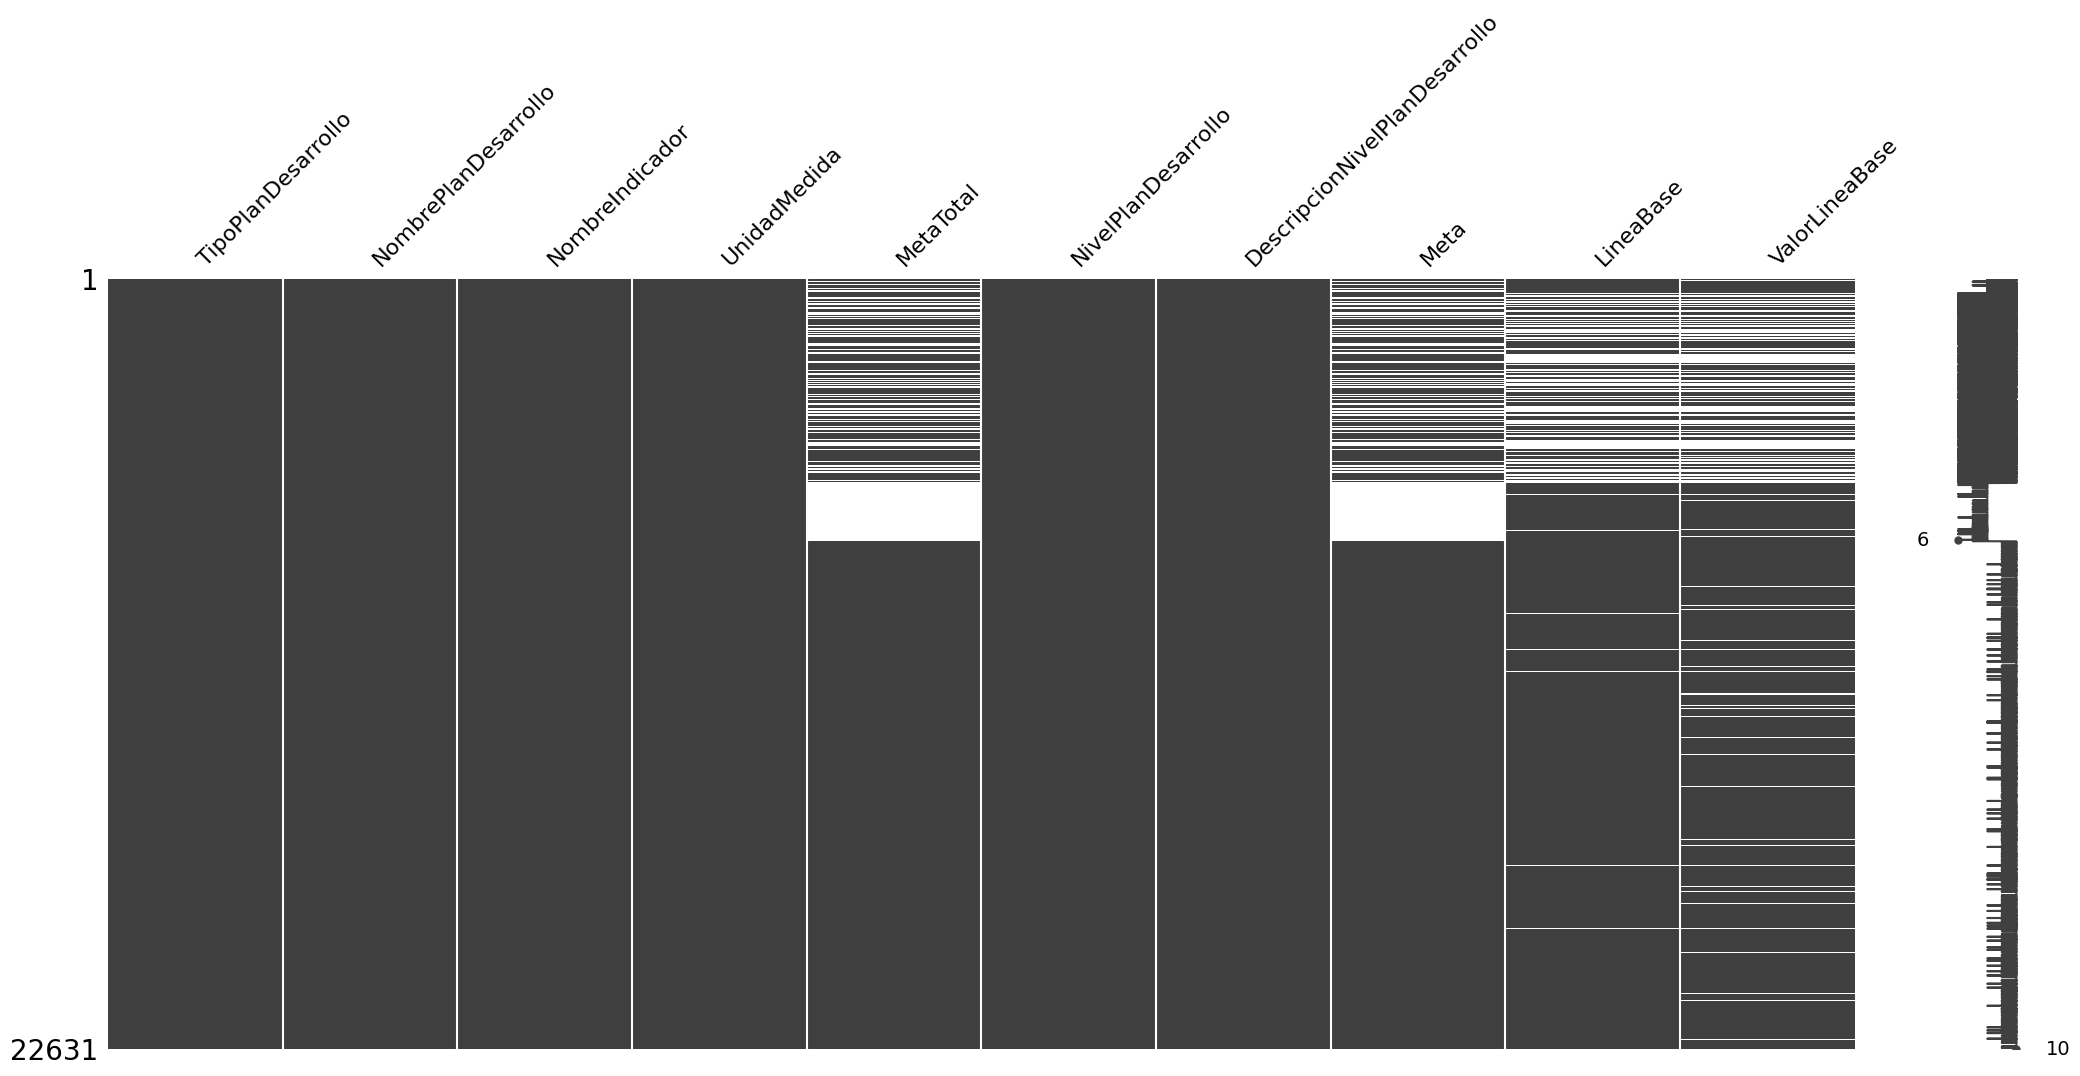

In [6]:
# a .nulos
import missingno as msno
msno.matrix(df)

In [7]:
df.isnull().sum()

TipoPlanDesarrollo                   0
NombrePlanDesarrollo                 0
NombreIndicador                      0
UnidadMedida                         0
MetaTotal                         4020
NivelPlanDesarrollo                  0
DescripcionNivelPlanDesarrollo       0
Meta                              4020
LineaBase                         3300
ValorLineaBase                    3956
dtype: int64

In [8]:
df.dtypes

TipoPlanDesarrollo                 object
NombrePlanDesarrollo               object
NombreIndicador                    object
UnidadMedida                       object
MetaTotal                         float64
NivelPlanDesarrollo                object
DescripcionNivelPlanDesarrollo     object
Meta                              float64
LineaBase                          object
ValorLineaBase                     object
dtype: object

In [16]:
df_copy= df.copy()
print(df.shape)
df_copy= df_copy.dropna(subset=['Meta','MetaTotal'])
print(df_copy.shape)
#df[df['MetaTotal'].isna()]

(22631, 10)
(18611, 10)


In [18]:
df_copy.isnull().sum()

TipoPlanDesarrollo                   0
NombrePlanDesarrollo                 0
NombreIndicador                      0
UnidadMedida                         0
MetaTotal                            0
NivelPlanDesarrollo                  0
DescripcionNivelPlanDesarrollo       0
Meta                                 0
LineaBase                         2142
ValorLineaBase                    2681
dtype: int64

In [19]:
# b. duplicados
df_copy=df_copy.drop_duplicates()
print(df_copy.shape) # Habian duplicados
df_copy.head()

(14249, 10)


,TipoPlanDesarrollo,NombrePlanDesarrollo,NombreIndicador,UnidadMedida,MetaTotal,NivelPlanDesarrollo,DescripcionNivelPlanDesarrollo,Meta,LineaBase,ValorLineaBase
0,Nacional,Pacto Por Colombia Pacto por la Equidad (2019-...,Porcentaje de estaciones de monitoreo de aguas...,Porcentaje,34.7,Línea,Transversal,5954.0,"El indicador mide el número de registros, ente...",30
1,Nacional,Pacto Por Colombia Pacto por la Equidad (2019-...,Política Pública Nacional del Participación co...,Número,1.0,Línea,C. Capítulo de Rrom,5969.0,Mide el proceso de formulación de la Política ...,0.00
2,Nacional,Pacto Por Colombia Pacto por la Equidad (2019-...,Política Pública Nacional del Participación co...,Número,1.0,Línea,B. Imperio de la ley y convivencia: derechos h...,5969.0,Mide el proceso de formulación de la Política ...,0.00
3,Nacional,Pacto Por Colombia Pacto por la Equidad (2019-...,Porcentaje de jóvenes que participan en escena...,Porcentaje,8.0,Línea,E. Participación ciudadana: promoviendo el diá...,5959.0,El porcentaje de jóvenes que participan en esc...,5.00
4,Nacional,Pacto Por Colombia Pacto por la Equidad (2019-...,Política Pública Nacional del Participación co...,Número,1.0,Línea,J. Equidad en la diversidad,5969.0,Mide el proceso de formulación de la Política ...,0.00


In [26]:
# c. valores atipicos
df_copy['TipoPlanDesarrollo'].value_counts()

Nacional    14249
Name: TipoPlanDesarrollo, dtype: int64

In [27]:
df_copy=df_copy.drop(columns=['TipoPlanDesarrollo'])
df_copy.head()

,NombrePlanDesarrollo,NombreIndicador,UnidadMedida,MetaTotal,NivelPlanDesarrollo,DescripcionNivelPlanDesarrollo,Meta,LineaBase,ValorLineaBase
0,Pacto Por Colombia Pacto por la Equidad (2019-...,Porcentaje de estaciones de monitoreo de aguas...,Porcentaje,34.7,Línea,Transversal,5954.0,"El indicador mide el número de registros, ente...",30
1,Pacto Por Colombia Pacto por la Equidad (2019-...,Política Pública Nacional del Participación co...,Número,1.0,Línea,C. Capítulo de Rrom,5969.0,Mide el proceso de formulación de la Política ...,0.00
2,Pacto Por Colombia Pacto por la Equidad (2019-...,Política Pública Nacional del Participación co...,Número,1.0,Línea,B. Imperio de la ley y convivencia: derechos h...,5969.0,Mide el proceso de formulación de la Política ...,0.00
3,Pacto Por Colombia Pacto por la Equidad (2019-...,Porcentaje de jóvenes que participan en escena...,Porcentaje,8.0,Línea,E. Participación ciudadana: promoviendo el diá...,5959.0,El porcentaje de jóvenes que participan en esc...,5.00
4,Pacto Por Colombia Pacto por la Equidad (2019-...,Política Pública Nacional del Participación co...,Número,1.0,Línea,J. Equidad en la diversidad,5969.0,Mide el proceso de formulación de la Política ...,0.00


3. Análisis Exploratorio de Datos (EDA)


In [29]:
df_copy['NombrePlanDesarrollo'].value_counts()

Pacto Por Colombia Pacto por la Equidad (2019-2022)    3506
Desarrollo para todos (2006-2010)                      2986
Todos por un nuevo país (2014-2018)                    2729
Hacia un Estado Comunitario (2022-2006)                2523
Prosperidad para Todos (2010-2014)                     2505
Name: NombrePlanDesarrollo, dtype: int64

<Axes: title={'center': 'Indicadores /plan Desarrollo'}, ylabel='Frecuencia de indicadores'>

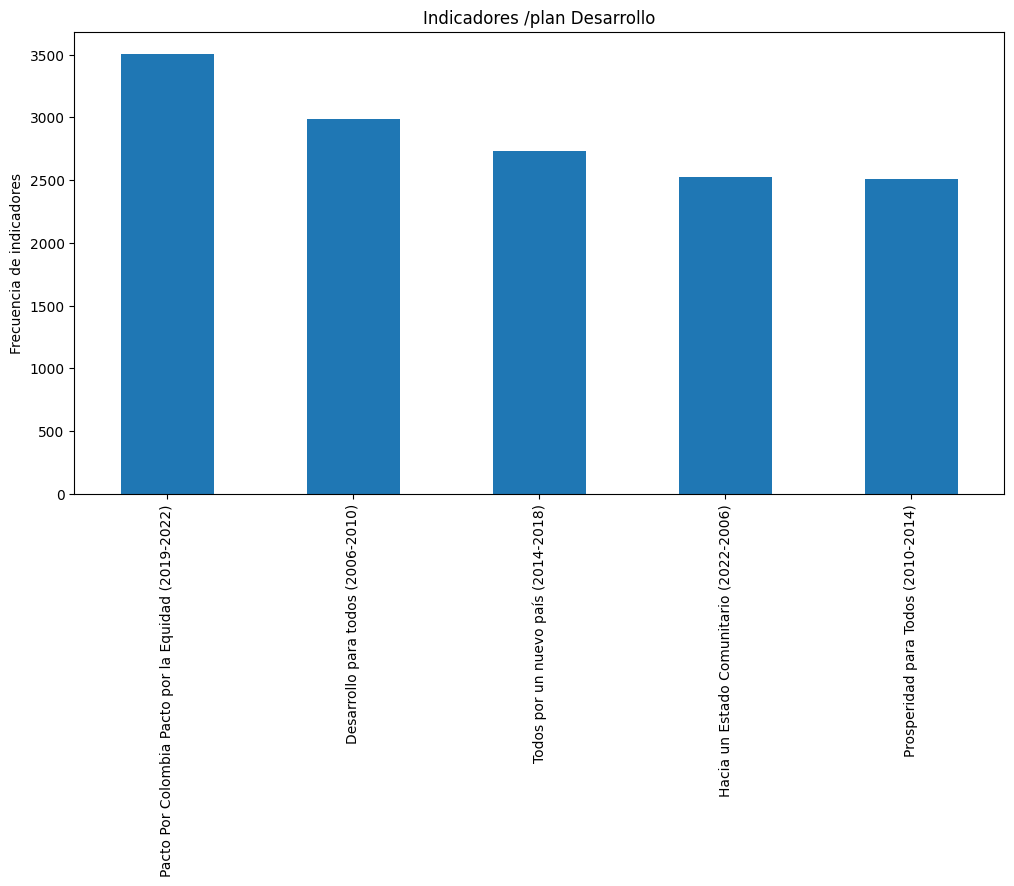

In [31]:
df_copy['NombrePlanDesarrollo'].value_counts().plot(kind='bar',figsize=(12,6),ylabel='Frecuencia de indicadores', title='Indicadores /plan Desarrollo')

El plan de desarrollo **Pacto Por Colombia Pacto por la Equidad (2019-2022)** se elige porque es el mas reciente y porque tiene la mayor cantidad de indicadores medibles. De esa forma se restringe el analisis

In [60]:
# Plan de desarrollo elegido
df_1=df_copy[df_copy['NombrePlanDesarrollo']=='Pacto Por Colombia Pacto por la Equidad (2019-2022)'].drop(columns=['NombrePlanDesarrollo'])
#df_1['ValorLineaBase']=df_1['ValorLineaBase'].str.replace('.','',regex=True) # remover puntos de la columna ValorLineaBAse
df_1['ValorLineaBase']=df_1['ValorLineaBase'].str.replace('1197.634.00','1197634',regex=True) # remover puntos de la columna ValorLineaBAse
df_1['ValorLineaBase']=df_1['ValorLineaBase'].str.replace('5200.000.00','5200000',regex=True) # remover puntos de la columna ValorLineaBAse
df_1['ValorLineaBase']=df_1['ValorLineaBase'].astype(float) # Se convierte a flotante 
df_1.head()

,NombreIndicador,UnidadMedida,MetaTotal,NivelPlanDesarrollo,DescripcionNivelPlanDesarrollo,Meta,LineaBase,ValorLineaBase
0,Porcentaje de estaciones de monitoreo de aguas...,Porcentaje,34.7,Línea,Transversal,5954.0,"El indicador mide el número de registros, ente...",30.0
1,Política Pública Nacional del Participación co...,Número,1.0,Línea,C. Capítulo de Rrom,5969.0,Mide el proceso de formulación de la Política ...,0.0
2,Política Pública Nacional del Participación co...,Número,1.0,Línea,B. Imperio de la ley y convivencia: derechos h...,5969.0,Mide el proceso de formulación de la Política ...,0.0
3,Porcentaje de jóvenes que participan en escena...,Porcentaje,8.0,Línea,E. Participación ciudadana: promoviendo el diá...,5959.0,El porcentaje de jóvenes que participan en esc...,5.0
4,Política Pública Nacional del Participación co...,Número,1.0,Línea,J. Equidad en la diversidad,5969.0,Mide el proceso de formulación de la Política ...,0.0


In [74]:
df_1.UnidadMedida.value_counts()[0:20]

Número                        2060
Porcentaje                     921
Hectáreas                       91
Kilómetros                      90
Tasa                            45
Millones de dólares             41
Índice                          18
Horas                           15
Toneladas                       14
Miles de millones de pesos      14
Name: UnidadMedida, dtype: int64

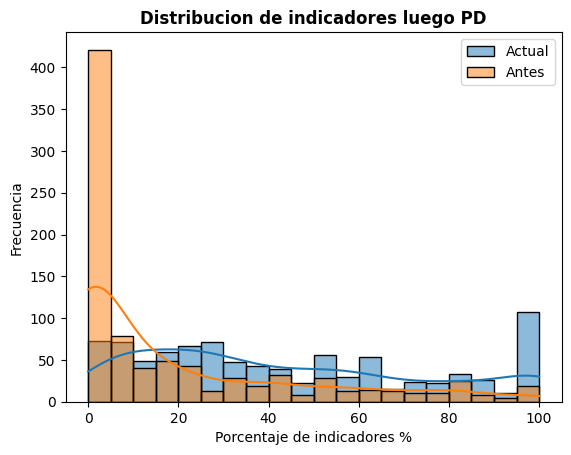

In [72]:
# Histograma
import seaborn as sns 
import matplotlib.pyplot as plt
sns.histplot(df_1[df_1['UnidadMedida']=='Porcentaje']['MetaTotal'], kde=True, bins=20,label='Actual')
sns.histplot(df_1[df_1['UnidadMedida']=='Porcentaje']['ValorLineaBase'], kde=True,bins=20,label='Antes')
plt.xlabel('Porcentaje de indicadores %')
plt.ylabel('Frecuencia')
plt.title('Distribucion de indicadores luego PD',fontsize=12,fontweight='bold')
plt.legend()

- En general se logra ver que la mayoría de indicadores pasan de estar entre 0-5% de cobertura a mas 5%. 
- Se reducen la cantidad de indicadores con cobertura 0%

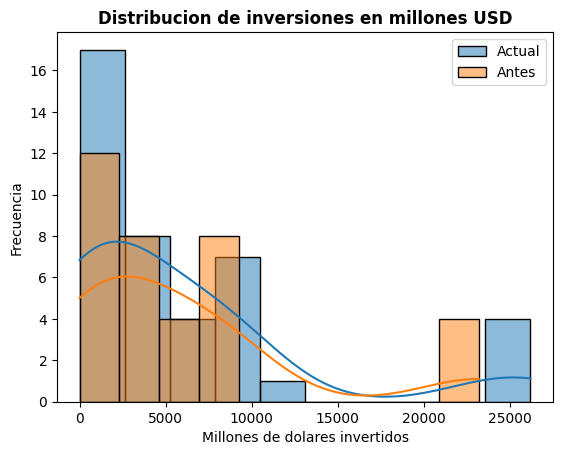

In [81]:
sns.histplot(df_1[df_1['UnidadMedida']=='Millones de dólares']['MetaTotal'], kde=True, bins=10,label='Actual')
sns.histplot(df_1[df_1['UnidadMedida']=='Millones de dólares']['ValorLineaBase'], kde=True, bins=10,label='Antes')
plt.xlabel('Millones de dolares invertidos')
plt.ylabel('Frecuencia')
plt.title('Distribucion de inversiones en millones USD',fontsize=12,fontweight='bold')
plt.legend()

- Ambas distirbuciones son asimetricas derecha
- Se puede observar que la cantidad de inversion en los rangos bajos > 5000 Millones USD ha aumentado y por otro lado las inversiones de mayor cuantia siguen con la misma frecuencia pero con mayores valores

In [87]:
david=df_1[df_1['UnidadMedida']=='Millones de dólares'].sort_values(by=['MetaTotal','ValorLineaBase'],ascending=False).head(5)
david

,NombreIndicador,UnidadMedida,MetaTotal,NivelPlanDesarrollo,DescripcionNivelPlanDesarrollo,Meta,LineaBase,ValorLineaBase
13871,Promedio móvil de las exportaciones no minero-...,Millones de dólares,26213.0,Línea,C. Un mundo de posibilidades: aprovechamiento ...,5689.0,Este indicador es una medición del grado de in...,23198.0
22396,Promedio móvil de las exportaciones no minero-...,Millones de dólares,25697.0,Línea,C. Un mundo de posibilidades: aprovechamiento ...,5689.0,Este indicador es una medición del grado de in...,23198.0
21047,Promedio móvil de las exportaciones no minero-...,Millones de dólares,24931.0,Línea,C. Un mundo de posibilidades: aprovechamiento ...,5689.0,Este indicador es una medición del grado de in...,23198.0
11512,Promedio móvil de las exportaciones no minero-...,Millones de dólares,23935.0,Línea,C. Un mundo de posibilidades: aprovechamiento ...,5689.0,Este indicador es una medición del grado de in...,23198.0
11479,Promedio móvil de Inversión Extranjera Directa...,Millones de dólares,10827.0,Línea,C. Un mundo de posibilidades: aprovechamiento ...,5690.0,Promedio móvil de la inversion extranjera dire...,9221.0


In [91]:
david.iloc[1]['LineaBase']

'Este indicador es una medición del grado de internacionalización del país, en términos de las ventas de Colombia hacia el mundo en bienes y servicios no mineros. Corresponde al promedio de las exportaciones de bienes no minero energéticos y servicios de los últimos cuatro años.'

In [97]:
df_1.loc[22608]['DescripcionNivelPlanDesarrollo']

'B. Colombia naranja: desarrollo del emprendimiento de base artística creativa y tecnológica para la creación de las nuevas industrias'

In [108]:
u='B. Colombia naranja: desarrollo del emprendimiento de base artística creativa y tecnológica para la creación de las nuevas industrias'
col_naranja=df_1[df_1['DescripcionNivelPlanDesarrollo']==u]
col_naranja[col_naranja['UnidadMedida']=='Millones de dólares']#.loc[7741]['NombreIndicador']

,NombreIndicador,UnidadMedida,MetaTotal,NivelPlanDesarrollo,DescripcionNivelPlanDesarrollo,Meta,LineaBase,ValorLineaBase
110,Valor de los proyectos de inversión extranjera...,Millones de dólares,50.0,Línea,B. Colombia naranja: desarrollo del emprendimi...,5699.0,El indicador mide el valor en millones de dóla...,NaN
7741,Valor de las exportaciones reportado por las e...,Millones de dólares,300.0,Línea,B. Colombia naranja: desarrollo del emprendimi...,5685.0,El indicador mide el monto de las exportacione...,NaN
11596,Valor de las exportaciones reportado por las e...,Millones de dólares,210.0,Línea,B. Colombia naranja: desarrollo del emprendimi...,5685.0,El indicador mide el monto de las exportacione...,NaN
11857,Valor de las exportaciones reportado por las e...,Millones de dólares,260.0,Línea,B. Colombia naranja: desarrollo del emprendimi...,5685.0,El indicador mide el monto de las exportacione...,NaN
14327,Valor de las exportaciones reportado por las e...,Millones de dólares,230.0,Línea,B. Colombia naranja: desarrollo del emprendimi...,5685.0,El indicador mide el monto de las exportacione...,NaN


4. Conclusiones

- Se analizaron los datos de principales indicadores del ultimo plan de desarrollo nacional. Se logran evidenciar algunas inconsistencias en el guardado de la información (formato, estructura, etc)
- El nivel de exportaciones durante los últimos 5 años ha incrementado considerablemente en sectores altamente productivos
- La mayoría de indicadores medidos a través de % del último plan de desarrollo muestran mejoras en el performance de las métricas